## Hierachical Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [47]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [48]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Print first 5 rows of the dataframe.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
# select Annual Income (k$) and Spending Score (1-100) columns and sample 100 rows randomly
X = df.iloc[:, [3, 4]]


In [54]:
# Generate clusters from the samples above
X, y = make_blobs(n_samples=100, centers=5, cluster_std=0.60, random_state=0)

# # Define function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_Centroids = []
    Y_Centroids = []

    for cluster in set(y_res):
        X_Centroids.append(np.mean(X[y_res == cluster, 0]))
        Y_Centroids.append(np.mean(X[y_res == cluster, 1]))
        
        plt.scatter(X[y_res == cluster, 0], 
                    X[y_res == cluster, 1], 
                    c='red')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.grid()
    plt.legend()
    plt.show()

* define function plot_dendogram

In [55]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

/Users/patrick/opt/anaconda3/envs/THE_ONE/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


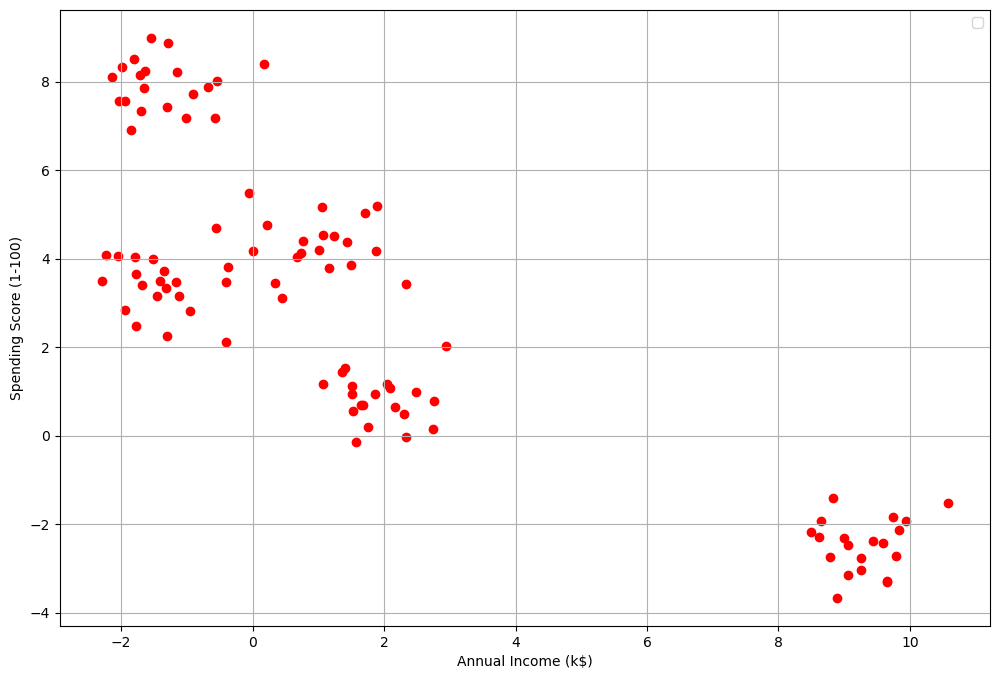

In [58]:
# fit the model
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

* Plot dendrogram

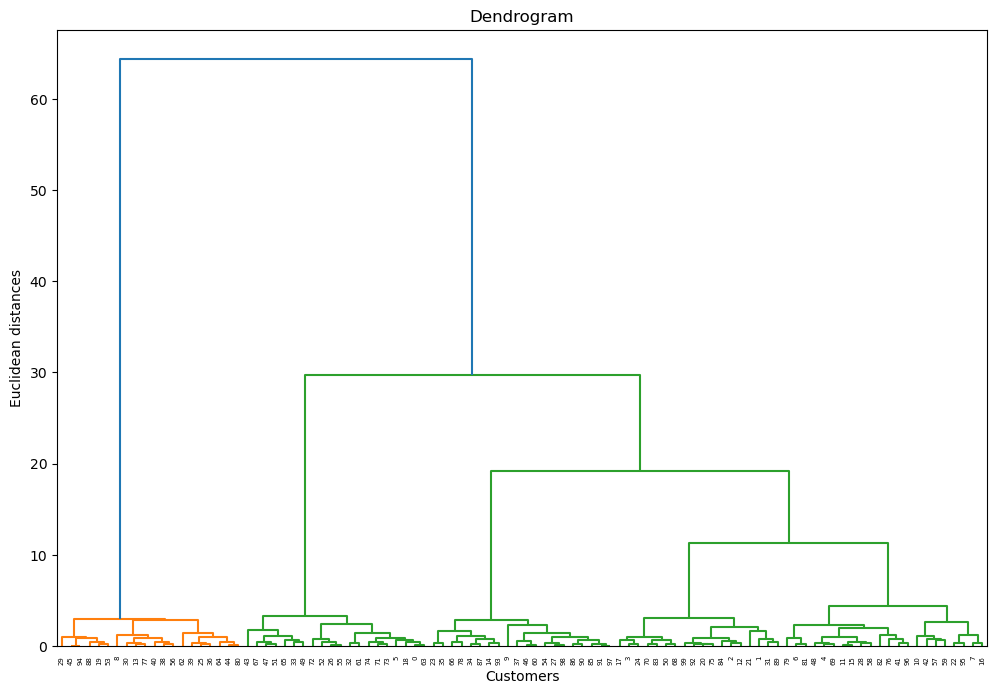

In [57]:
# plot dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


* Fit Hierarchical clustering with optimal number of clusters

/Users/patrick/opt/anaconda3/envs/THE_ONE/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2 1 1 1 0 2 0 0 4 3 0 0 1 4 3 0 0 1 2 4 1 1 0 3 1 4 2 3 0 4 4 1 2 2 3 3 4
 3 4 4 4 0 0 2 4 4 3 2 0 2 1 2 2 4 3 2 4 0 0 0 3 2 4 2 4 2 3 2 1 0 1 2 2 2
 2 1 0 4 3 0 4 0 0 1 1 3 3 3 4 1 3 3 1 3 4 0 0 3 3 1]


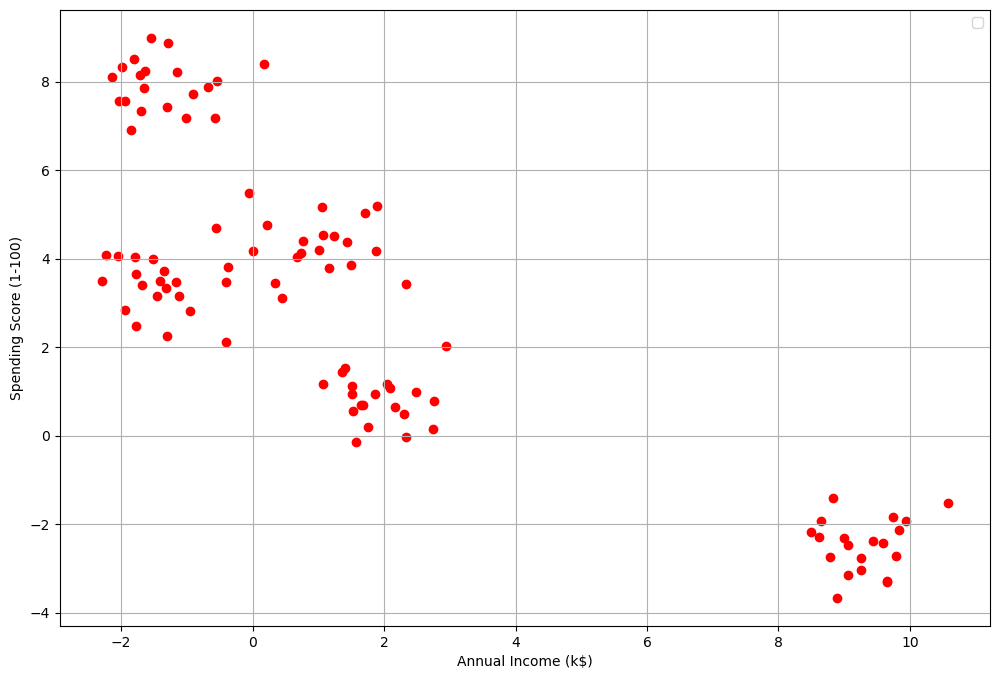

In [59]:
#fit hierarchical clustering with optimal number of clusters
ac = AgglomerativeClustering(affinity='euclidean',
                                linkage='ward',
                                n_clusters = 5)
ac.fit(X)
print(ac.labels_)
plot_clusters(X,ac.labels_)
plt.show()


* define function plot_clusters

* Plot HC clusters